# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9381 Колованов Родион, вариант 6.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Обыкновенные дифференциальные уравнения (ОДУ) — это уравнения, зависящие от одной независимой переменной, имеющие вид

$$ f(x, y, y', y'', \dots, y^{(n)}) = 0, $$ где $x$ - независимая переменная.

Общим решением ОДУ является множество таких функций $y$, что $ f(x, y, y', y'', \dots, y^{(n)}) = 0 $ для $\forall{x}$.

Задача Коши подразумевает поиск частного решения из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:

\begin{cases}
    f(x, y, y', y'', \dots, y^{(n)}) = 0 \\
    y(x_0) = y_0 \\
    y'(x_0) = y_1 \\
    y''(x_0) = y_2 \\
    \dots \\
    y^{(n-1)}(x_0) = y_{n-1}
\end{cases}

## Постановка задачи

Дано дифференциальное уравнение:

$$ y'' = f(x, y), \;\; a < x < b \;\; (1) $$

и граничные условия

$$ y(a) = y_a \;\; y(b) = y_b \;\; (2) $$

Требуется найти решение задачи $(1)$ - $(2)$ и построить его график.


Рассмотрим задачу Коши для уравнения $(1)$ с начальными условиями

$$ y(a) = y_a \;\; y'(a) = h \;\; (3) $$

План решения основан на многократном решении задачи Коши $(1)$, $(3)$.
Значение решения задачи Коши при $x = b$ является функцией от $h$.
Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$$ y(b, h) = y_b \;\; (4) $$

Это уравнение с одним неизвестным $h$. Для его решения можно применить стандартный метод половинного
деления.

## Схема решения

1. Задаем наугад число $h_0$, решаем задачу Коши. Далее вычисляем $y(b, h_0)$.
Если оказалось, что $y(b, h_0) = y_b$, то мы решили краевую задачу. Если же нет, то переходим на следующий шаг.


2. Пусть, например, $y(b, h_0) > y_b$. Выберем шаг $\Delta{h}$ и решаем несколько раз задачу Коши при $h_1 = h_0 + \Delta{h}$.
Если снова получили $y(b, h_1) > y_b$, причём $y(b, h_0) > y(b, h_1) > y_b$, решаем задачу Коши при $h_2 = h_1 + \Delta{h}$ и т.д.
Процесс повторяется пока не получим неравенство $y(b, h_m) < y_b$.
Это означает, что искомое значение попало в «вилку», т.е. $h \in (h_{m−1}; h_m)$.
Шаг $\Delta{h}$ не должен быть слишком маленьким, иначе процесс сильно затянется.
Знак шага также не известен заранее, может оказаться, что нужно не увеличивать наклон, а уменьшать.


3. Далее применяется стандартный процесс половинного деления к уравнению (4).


4. Процесс останавливаем, когда выполнится неравенство $|y(b, h_m) − y(b, h_{m−1})| < 0.001$.


5. Возможен случай, когда ни одна интегральная кривая не проходит через точку $(b, y_b)$, т.е. задача не имеет решения.
Поэтому нужно ограничить число шагов. Процесс останавливается при $m > M$, где $M$ – заданное число (например, 100).

## Выполнение работы

### Вариант 6

$$ a = 0, \;\; b = 2, \;\; y_a = 3, \;\; y_b = -3 $$

$$ y'' = f(x, y) = 2^x (x - y) $$

Сведем задачу к следующей системе:

\begin{cases}
    y'' = f(x, y) = 2^x (x - y) \\
    y(a) = y_a \\
    y'(a) = h \\
\end{cases}

$$ y' = g(x, y) $$

\begin{cases}
    y' = g(x, y) \\
    g' = f(x, y) = 2^x (x - y) \\
    y(a) = y_a \\
    y'(a) = h \\
\end{cases}

Подключим необходимые библиотеки:

In [212]:
from scipy import integrate
from matplotlib.pyplot import grid, legend, plot, xlabel
from numpy import linspace

%matplotlib inline

Объявим переменные $a$, $b$, $y_a$, $y_b$ и функцию $y'' = f(x, y)$:

In [213]:
a = 0
b = 2
y_a = 3
y_b = -3

def f(x, y_x):
    return (2 ** x) * (x - y_x)

Задаем наугад число $h_0$: $h_0 = 0$. Вычислим $y(b, h_0)$ и проверим условие $y(b, h_0) = y_b = -3$:

In [214]:
h = 0
n = 201
X = linspace(a, b, n)

def de_system_func(x, values):
    y_x, dy_x = values
    dy = dy_x
    ddy = (2 ** x) * (x - y_x)
    return dy, ddy

results = integrate.solve_ivp(de_system_func, (a, b), (y_a, h), t_eval=X)
Y = results.y[0]
y_bh = Y[-1]

print("y(b={},h={}) = {}".format(b, h, y_bh))

y(b=2,h=0) = -0.15288183786667225


Как видно, $y(b, h_0) = -0.15288183786667225 > y_b = -3$. Не повезло, краевая задача не была решена. В этом случае будем изменять $h$ на $\Delta{h}$ до тех пор, пока $y(b, h_m)$ не станет меньше $y_b = -3$:

In [215]:
dh = -1
steps = 1000

for step in range(steps):
    h_right = h
    h += dh
    h_left = h

    results = integrate.solve_ivp(de_system_func, (a, b), (y_a, h), t_eval=X)

    Y = results.y[0]
    y_bh = Y[-1]

    if y_bh < y_b:
        break

print("h принадлежит [{}; {}]".format(h_left, h_right))

h принадлежит [-18; -17]


Далее при помощи метода половинного деления найдем значение $h$, при котором выполняется равенство $y(b, h_0) = y_b$ с некоторой точностью $(|y(b, h_m) − y(b, h_{m−1})| < 0.001)$:

In [216]:
results_left = integrate.solve_ivp(de_system_func, (a, b), (y_a, h_left), t_eval=X)
results_right = integrate.solve_ivp(de_system_func, (a, b), (y_a, h_right), t_eval=X)

for step in range(steps):
    h_mid = h_left + abs(h_right - h_left) / 2
    results_mid = integrate.solve_ivp(de_system_func, (a, b), (y_a, h_mid), t_eval=X)
    y_bh = results_mid.y[0][-1]
    y_bh_left = results_left.y[0][-1]

    if (y_bh_left - y_b) * (y_bh - y_b) < 0:
        h_right = h_mid
        results_right = results_mid
    else:
        h_left = h_mid
        results_left = results_mid
    
    if abs(results_left.y[0][-1] - results_right.y[0][-1]) < 0.001:
        break

print("h = {}: f(b, h) = {}".format(h_left, results_left.y[0][-1]))

h = -17.3984375: f(b, h) = -3.0004121634269856


Отобразим график полученных функций $y$, $y'$ и $y''$:

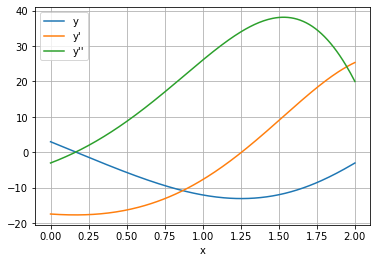

In [217]:
h = h_left
results = results_left

Y = results.y[0]
dY = results.y[1]
ddY = [f(X[i], Y[i]) for i in range(len(X))]

plot(X, Y, label="y")
plot(X, dY, label="y'")
plot(X, ddY, label="y''")
xlabel("x")
grid(True)
legend()

## Выводы

В ходе практической работы была решена краевая задача для уравнения 2-ого порядка с использованием методов численного интегрирования с определенной точностью.

Были получены следующие результаты:
- $ h = -17.3984375 $
- $ f(b, h) = -3.0004121634269856 $

Значение $h$ было найдено с точностью $|y(b, h_m) − y(b, h_{m−1})| < 0.001$.